# Performing Exploratory Data Analysis on O\*NET Data

The purpose of this notebook is to perform data exploration on the O\*NET data. We want to answer questions like <i>What kinds of tasks have multiple GWA labels?</i> or <i>Which labels are the most / least common?</i> etc.

**Last Updated**: Wednesday July 24, 2019
<br> **Author**: Rebecca Hu

In [1]:
# load in necessary packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
# read in the data
df = pd.read_csv('onet_tasks_gwas.csv')

In [4]:
df

,Task,GWA
0,"Review and analyze legislation, laws, or publi...",Analyzing Data or Information
1,"Review and analyze legislation, laws, or publi...",Provide Consultation and Advice to Others
2,Direct or coordinate an organization's financi...,"Guiding, Directing, and Motivating Subordinates"
3,"Confer with board members, organization offici...","Communicating with Supervisors, Peers, or Subo..."
4,Analyze operations to evaluate performance of ...,Analyzing Data or Information
5,"Direct, plan, or implement policies, objective...",Making Decisions and Solving Problems
6,"Direct, plan, or implement policies, objective...",Developing Objectives and Strategies
7,"Direct, plan, or implement policies, objective...","Guiding, Directing, and Motivating Subordinates"
8,"Prepare budgets for approval, including those ...","Guiding, Directing, and Motivating Subordinates"
9,Direct or coordinate activities of businesses ...,"Guiding, Directing, and Motivating Subordinates"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20223 entries, 0 to 20222
Data columns (total 2 columns):
Task    20223 non-null object
GWA     20223 non-null object
dtypes: object(2)
memory usage: 316.1+ KB


In [24]:
print('# of unique tasks: ', df.Task.nunique())

# of unique tasks:  17397


In [25]:
print('# of unique GWA categories: ', df.GWA.nunique())

# of unique GWA categories:  37


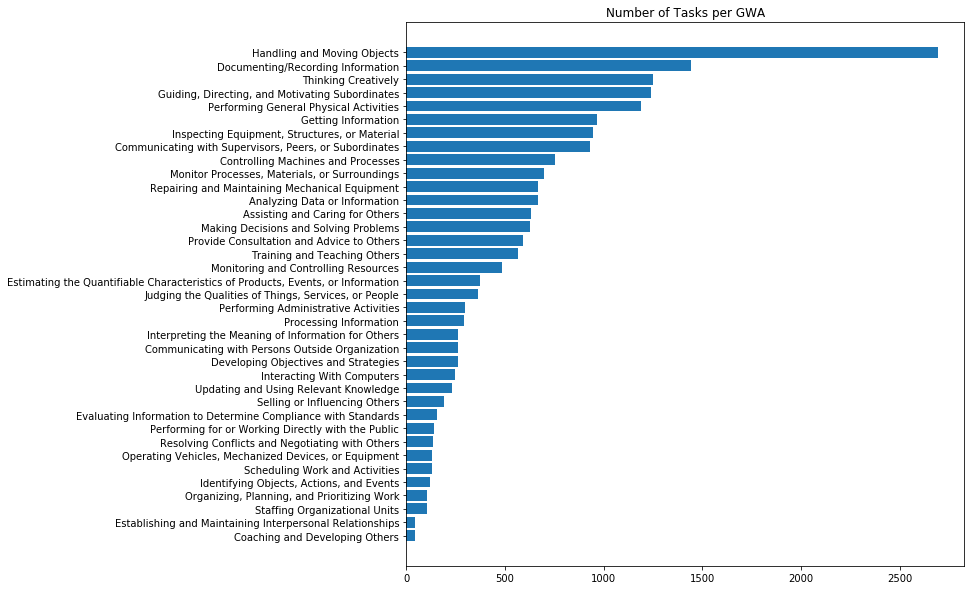

In [26]:
# plot of how many tasks fall into each GWA category
num_tasks = df['GWA'].value_counts(ascending = True)

plt.figure(figsize=(10,10))
plt.barh(num_tasks.index, num_tasks)
plt.title('Number of Tasks per GWA')
plt.show()

From this bar chart we can see that the distribution of tasks across the GWA categories is very spread out, with <i>Handling and Moving Objects</i> having over 2500 tasks, and <i>Coaching and Developing Others</i> with less than 100. Class imbalance is a problem that is found in most datasets, and if the imbalance is very noticeable, like it is here, than we will probably need to use sampling techniques to improve our model. 

{1: 14759, 2: 2450, 3: 188}


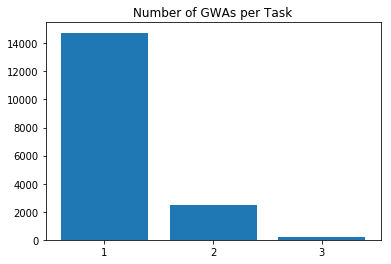

In [30]:
# plot of how many GWA labels the tasks have
num_gwas = {}
for task in df['Task'].value_counts(ascending = True):
    if task in num_gwas.keys():
        num_gwas[task] += 1
    else:
        num_gwas[task] = 1
print(num_gwas)
plt.figure()
plt.bar(list(num_gwas.keys()), list(num_gwas.values()))
plt.xticks([1, 2, 3])
plt.title('Number of GWAs per Task')
plt.show()

From this plot we can see that most tasks are only labeled with one GWA (>14000). There are some labeled with two (>2000). Very few have three labels (<100).

---

Let's take a closer look at the data.

In [38]:
pd.set_option('display.max_colwidth', -1)

df.sample(50, random_state = 526)

,Task,GWA
8511,"Refer patients to specialists when condition exceeds experience, expertise, or scope of practice.",Assisting and Caring for Others
390,Compile and record operational data on forms or in log books.,Documenting/Recording Information
5025,Develop or test new drugs or medications intended for commercial distribution.,Developing Objectives and Strategies
2391,Review billing for accuracy.,Processing Information
12256,"Sell various types of insurance policies to businesses and individuals on behalf of insurance companies, including automobile, fire, life, property, medical and dental insurance, or specialized policies, such as marine, farm/crop, and medical malpractice.",Selling or Influencing Others
1371,"Identify opportunities to reuse or recycle materials to minimize consumption of new materials, minimize waste, or to convert wastes to by-products.","Identifying Objects, Actions, and Events"
13376,"Pack, seal, label, or affix postage to prepare materials for shipping, using hand tools, power tools, or postage meter.",Handling and Moving Objects
6702,"Participate in conferences, seminars, and training sessions to keep abreast of developments in the field, and integrate relevant information into training programs.",Updating and Using Relevant Knowledge
4087,Coordinate the implementation or scheduling of validation testing with affected departments and personnel.,"Guiding, Directing, and Motivating Subordinates"
10422,Prepare written reports that detail specifics of fire incidents.,Documenting/Recording Information


Examining this data, I've noticed a few things: 
1. Some tasks just appear to be improperly labeled. For example, <i>Design posters and special displays to promote use of library facilities or specific reading programs at libraries.</i> seems like it should include the GWA <i>Thinking Creatively</i> as it involves designing posters for promotional use.


2. The definitions of many GWA categories overlap and/or they are not mutually exclusive, so it is difficult to know which one is appropriate to label a task with. For example, <i>Communicating with Persons Outside Organization</i> and <i>Performing for or Working Directly with the Public</i> both include interacting with the public and customers in their descriptions as is defined in the O*\NET documentation.


3. Some tasks should be labeled with more than one label to fully describe everything the task entails, but they are not. For example, the task <i>Mix and match colors of paint, stain, or varnish with oil or thinning and drying additives to obtain desired colors and consistencies.</i> is labeled as <i>Performing General Physical Activities</i> when it should also be labeled as <i>Handling and Moving Objects</i> since the task involves using objects to complete the task.

In [43]:
df[df['Task'] == 'Design posters and special displays to promote use of library facilities or specific reading programs at libraries.']

,Task,GWA
7075,Design posters and special displays to promote use of library facilities or specific reading programs at libraries.,Documenting/Recording Information


In [47]:
df[df['Task'] == 'Mix and match colors of paint, stain, or varnish with oil or thinning and drying additives to obtain desired colors and consistencies.']

,Task,GWA
14609,"Mix and match colors of paint, stain, or varnish with oil or thinning and drying additives to obtain desired colors and consistencies.",Performing General Physical Activities


Given all of these observations, it may be difficult to continue with our classification task and be confident in our ability to accurately label these tasks if our training data's labels are untrustworthy. However, given the goal of our project, if we just want to get an idea of what kinds of activities are being completed by people, a rough classification may be sufficient.

# One-vs-Rest Model

"Handling and Moving Objects" vs Rest

In [135]:
#Logit pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=stemmed_words)),
    ('logit', LogisticRegression())])

In [ ]:
# baseline preprocessing + sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

hamo_sample = df[df['GWA'] == 'Handling and Moving Objects'].sample(2000)
nonhamo_df = df[df['GWA'] != 'Handling and Moving Objects'].sample(3000)
nonhamo_df['GWA'] = ['Not Handling and Moving Objects'] * 3000
equal_hamo_data = pd.concat([hamo_sample, nonhamo_df])
X_train, X_test, y_train, y_test = train_test_split(equal_hamo_data['Task'], 
                                                    equal_hamo_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

In [ ]:
# fit the model and make predictions
logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())

In [139]:
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)
#results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
#results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.056
Precision:  [0.95390898 0.93754487]
Recall:  [0.90381426 0.97064288]
F1-Score:  [0.9281862  0.95380683]
**********************************************************
Test Error:  0.162
Precision:  [0.78350515 0.87254902]
Recall:  [0.79581152 0.86407767]
F1-Score:  [0.78961039 0.86829268]


,Task,Actual,Predicted
16595,Inspect electrical units of railroad grade cro...,Not Handling and Moving Objects,Handling and Moving Objects
18924,"Verify paint consistency, using a viscosity me...",Not Handling and Moving Objects,Handling and Moving Objects
11182,Replenish supplies of food or equipment at ste...,Handling and Moving Objects,Not Handling and Moving Objects
18567,"Type instructions on computer keyboards, push ...",Handling and Moving Objects,Not Handling and Moving Objects
9177,Collect and study blood samples to determine t...,Handling and Moving Objects,Not Handling and Moving Objects
19026,"Measure, weigh, or mix cleaning solutions, usi...",Not Handling and Moving Objects,Handling and Moving Objects
13392,"Receive, open, unpack and issue sales floor me...",Handling and Moving Objects,Not Handling and Moving Objects
14693,Inspect structures to assess material or equip...,Not Handling and Moving Objects,Handling and Moving Objects
10969,"Stock, organize, and clean kitchens and cookin...",Handling and Moving Objects,Not Handling and Moving Objects
15311,"Scrape or wash conveyors, using belt scrapers ...",Not Handling and Moving Objects,Handling and Moving Objects


In [153]:
# pre-processing without stemming + sampling

nonstem_logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 3))),
    ('logit', LogisticRegression())])

hamo_sample = df[df['GWA'] == 'Handling and Moving Objects'].sample(2500)
nonhamo_df = df[df['GWA'] != 'Handling and Moving Objects'].sample(2500)
nonhamo_df['GWA'] = ['Not Handling and Moving Objects'] * 2500
equal_hamo_data = pd.concat([hamo_sample, nonhamo_df])
X_train, X_test, y_train, y_test = train_test_split(equal_hamo_data['Task'], 
                                                    equal_hamo_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.039
Precision:  [0.949116  0.9738652]
Recall:  [0.97475642 0.94736842]
F1-Score:  [0.96176535 0.96043409]
**********************************************************
Test Error:  0.13
Precision:  [0.84435798 0.89711934]
Recall:  [0.89669421 0.84496124]
F1-Score:  [0.86973948 0.87025948]


,Task,Actual,Predicted
11868,Tint eyelashes and eyebrows.,Handling and Moving Objects,Not Handling and Moving Objects
18371,Preprocess feedstock in preparation for physic...,Handling and Moving Objects,Not Handling and Moving Objects
17076,Signal and assist other workers to remove and ...,Not Handling and Moving Objects,Handling and Moving Objects
17195,"Replace worn tools, using hand tools, and shar...",Not Handling and Moving Objects,Handling and Moving Objects
18597,"Sharpen cutting blades, knives, or saws, using...",Not Handling and Moving Objects,Handling and Moving Objects
4848,Separate scrap or waste materials for recyclin...,Not Handling and Moving Objects,Handling and Moving Objects
9193,"Cultivate, isolate, or assist in identifying m...",Handling and Moving Objects,Not Handling and Moving Objects
17125,Verify conformance of machined work to specifi...,Not Handling and Moving Objects,Handling and Moving Objects
6058,"Collect geospatial data, using technologies su...",Handling and Moving Objects,Not Handling and Moving Objects
11991,"Perform housekeeping duties, such as cooking, ...",Handling and Moving Objects,Not Handling and Moving Objects


In [156]:
# baseline preprocessing, no sampling

hamo_sample = df[df['GWA'] == 'Handling and Moving Objects']
nonhamo_df = df[df['GWA'] != 'Handling and Moving Objects']
nonhamo_df['GWA'] = ['Not Handling and Moving Objects'] * nonhamo_df.shape[0]
equal_hamo_data = pd.concat([hamo_sample, nonhamo_df])
X_train, X_test, y_train, y_test = train_test_split(equal_hamo_data['Task'], 
                                                    equal_hamo_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Training Error:  0.09
Precision:  [0.90947977 0.92555556]
Recall:  [0.99575976 0.34722801]
F1-Score:  [0.95066614 0.50500152]
**********************************************************
Test Error:  0.095
Precision:  [0.91608013 0.78409091]
Recall:  [0.97803468 0.47098976]
F1-Score:  [0.94604417 0.58848614]


,Task,Actual,Predicted
17089,"Set up, operate, or tend machines to saw, cut,...",Not Handling and Moving Objects,Handling and Moving Objects
11850,"Massage, shampoo, and condition patron's hair ...",Handling and Moving Objects,Not Handling and Moving Objects
14562,Measure and mark outlines or patterns on glass...,Not Handling and Moving Objects,Handling and Moving Objects
15445,Check antenna positioning to ensure specified ...,Handling and Moving Objects,Not Handling and Moving Objects
15199,"Monitor progress of drilling operations, and s...",Handling and Moving Objects,Not Handling and Moving Objects


In [158]:
# no stemming, no sampling 
nonstem_logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 3))),
    ('logit', LogisticRegression())])

hamo_sample = df[df['GWA'] == 'Handling and Moving Objects']
nonhamo_df = df[df['GWA'] != 'Handling and Moving Objects']
nonhamo_df['GWA'] = ['Not Handling and Moving Objects'] * nonhamo_df.shape[0]
equal_hamo_data = pd.concat([hamo_sample, nonhamo_df])
X_train, X_test, y_train, y_test = train_test_split(equal_hamo_data['Task'], 
                                                    equal_hamo_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Training Error:  0.097
Precision:  [0.90204058 0.93103448]
Recall:  [0.99670657 0.29116549]
F1-Score:  [0.94701369 0.4436019 ]
**********************************************************
Test Error:  0.099
Precision:  [0.91185897 0.76821192]
Recall:  [0.97990815 0.41281139]
F1-Score:  [0.94465966 0.53703704]


,Task,Actual,Predicted
17500,"Select, position, align, and bolt jigs, holdin...",Not Handling and Moving Objects,Handling and Moving Objects
14174,Set vertical and horizontal alignment of struc...,Handling and Moving Objects,Not Handling and Moving Objects
14231,Build sleds from logs and timbers for use in h...,Handling and Moving Objects,Not Handling and Moving Objects
17108,"Replace defective blades or wheels, using hand...",Not Handling and Moving Objects,Handling and Moving Objects
11868,Tint eyelashes and eyebrows.,Handling and Moving Objects,Not Handling and Moving Objects
15305,"Repair, oil, and adjust machines, and change c...",Not Handling and Moving Objects,Handling and Moving Objects
18015,Draw outlines of pattern parts by adapting or ...,Handling and Moving Objects,Not Handling and Moving Objects
17036,Operate shearing mechanisms to cut rods to spe...,Not Handling and Moving Objects,Handling and Moving Objects
16926,"Press switches and turn knobs to start, adjust...",Not Handling and Moving Objects,Handling and Moving Objects
17563,Immerse objects to be coated or plated into cl...,Handling and Moving Objects,Not Handling and Moving Objects


"Analyzing Data or Information" vs Rest

In [163]:
#baseline preprocessing + sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

adoi_sample = df[df['GWA'] == 'Analyzing Data or Information'].sample(600)
nonadoi_df = df[df['GWA'] != 'Analyzing Data or Information'].sample(600)
nonadoi_df['GWA'] = ['Not Analyzing Data or Information'] * 600
equal_adoi_data = pd.concat([adoi_sample, nonadoi_df])
X_train, X_test, y_train, y_test = train_test_split(equal_adoi_data['Task'], 
                                                    equal_adoi_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.009
Precision:  [0.98378378 0.99809524]
Recall:  [0.99817185 0.98311445]
F1-Score:  [0.99092559 0.9905482 ]
**********************************************************
Test Error:  0.208
Precision:  [0.71212121 0.88888889]
Recall:  [0.88679245 0.71641791]
F1-Score:  [0.78991597 0.79338843]


,Task,Actual,Predicted
420,"Monitor gas collection systems emissions data,...",Not Analyzing Data or Information,Analyzing Data or Information
7218,"Develop product packaging, display, and pricin...",Not Analyzing Data or Information,Analyzing Data or Information
1906,"Develop or maintain models for logistics uses,...",Analyzing Data or Information,Not Analyzing Data or Information
3158,"Prepare project status reports by collecting, ...",Not Analyzing Data or Information,Analyzing Data or Information
4399,Compute mathematical formulas to develop and d...,Analyzing Data or Information,Not Analyzing Data or Information
19725,"Calculate sightings of land, using electronic ...",Analyzing Data or Information,Not Analyzing Data or Information
3286,Define data requirements and gather and valida...,Not Analyzing Data or Information,Analyzing Data or Information
1691,Submit samples of products to government labor...,Not Analyzing Data or Information,Analyzing Data or Information
3274,Assemble sets of assumptions and explore the c...,Analyzing Data or Information,Not Analyzing Data or Information
5742,Develop or test new methods or models of trans...,Not Analyzing Data or Information,Analyzing Data or Information


In [173]:
# pre-processing without stemming + sampling

nonstem_logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 3))),
    ('logit', LogisticRegression())])

adoi_sample = df[df['GWA'] == 'Analyzing Data or Information'].sample(600)
nonadoi_df = df[df['GWA'] != 'Analyzing Data or Information'].sample(600)
nonadoi_df['GWA'] = ['Not Analyzing Data or Information'] * 600
equal_adoi_data = pd.concat([adoi_sample, nonadoi_df])
X_train, X_test, y_train, y_test = train_test_split(equal_adoi_data['Task'], 
                                                    equal_adoi_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.007
Precision:  [0.99449541 0.99065421]
Recall:  [0.99085923 0.99437148]
F1-Score:  [0.99267399 0.99250936]
**********************************************************
Test Error:  0.108
Precision:  [0.91666667 0.875     ]
Recall:  [0.83018868 0.94029851]
F1-Score:  [0.87128713 0.90647482]


,Task,Actual,Predicted
12589,Make recommendations to management concerning ...,Not Analyzing Data or Information,Analyzing Data or Information
1122,Record adverse event and side effect data and ...,Not Analyzing Data or Information,Analyzing Data or Information
13233,Plan and follow the most efficient routes for ...,Analyzing Data or Information,Not Analyzing Data or Information
11666,Provide managers with budget recommendations a...,Not Analyzing Data or Information,Analyzing Data or Information
5519,Conduct research to study the relationships am...,Not Analyzing Data or Information,Analyzing Data or Information
2678,"Design or develop software systems, using scie...",Analyzing Data or Information,Not Analyzing Data or Information
4399,Compute mathematical formulas to develop and d...,Analyzing Data or Information,Not Analyzing Data or Information
4545,"Record laboratory or field data, including num...",Not Analyzing Data or Information,Analyzing Data or Information
2346,Review audit reports of internal and external ...,Not Analyzing Data or Information,Analyzing Data or Information
5473,Prepare or deliver reports or presentations of...,Not Analyzing Data or Information,Analyzing Data or Information


In [176]:
# baseline preprocessing, no sampling

adoi_sample = df[df['GWA'] == 'Analyzing Data or Information']
nonadoi_df = df[df['GWA'] != 'Analyzing Data or Information']
nonadoi_df['GWA'] = ['Not Analyzing Data or Information'] * nonadoi_df.shape[0]
equal_adoi_data = pd.concat([adoi_sample, nonadoi_df])
X_train, X_test, y_train, y_test = train_test_split(equal_adoi_data['Task'], 
                                                    equal_adoi_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Training Error:  0.032
Precision:  [0.96755746 0.92857143]
Recall:  [0.99994317 0.02155887]
F1-Score:  [0.98348378 0.04213938]
**********************************************************
Test Error:  0.029
Precision:  [0.97266402 0.63636364]
Recall:  [0.99796022 0.11290323]
F1-Score:  [0.98514976 0.19178082]


,Task,Actual,Predicted
1226,"Analyze proposed legislation, regulations, or ...",Analyzing Data or Information,Not Analyzing Data or Information
5055,Conduct chemical analyses of substances such a...,Analyzing Data or Information,Not Analyzing Data or Information
12288,Analyze market conditions to determine optimum...,Analyzing Data or Information,Not Analyzing Data or Information
9254,Examine slides under microscopes to ensure tis...,Analyzing Data or Information,Not Analyzing Data or Information
13662,"Determine manner in which mail is to be sent, ...",Analyzing Data or Information,Not Analyzing Data or Information
13378,"Determine shipping methods, routes, or rates f...",Analyzing Data or Information,Not Analyzing Data or Information
5734,"Interpret and analyze policies, public issues,...",Not Analyzing Data or Information,Analyzing Data or Information
541,Evaluate freight or inventory costs associated...,Analyzing Data or Information,Not Analyzing Data or Information
3068,Interpret aerial or ortho photographs.,Analyzing Data or Information,Not Analyzing Data or Information
5527,"Analyze data from surveys, old records, or cas...",Not Analyzing Data or Information,Analyzing Data or Information


In [178]:
# no stemming, no sampling

nonstem_logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 3))),
    ('logit', LogisticRegression())])

adoi_sample = df[df['GWA'] == 'Analyzing Data or Information']
nonadoi_df = df[df['GWA'] != 'Analyzing Data or Information']
nonadoi_df['GWA'] = ['Not Analyzing Data or Information'] * nonadoi_df.shape[0]
equal_adoi_data = pd.concat([adoi_sample, nonadoi_df])
X_train, X_test, y_train, y_test = train_test_split(equal_adoi_data['Task'], 
                                                    equal_adoi_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Training Error:  0.033
Precision:  [0.9668408  0.93333333]
Recall:  [0.99994313 0.02269044]
F1-Score:  [0.9831134 0.0443038]
**********************************************************
Test Error:  0.023
Precision:  [0.97722772 0.66666667]
Recall:  [0.99949367 0.04166667]
F1-Score:  [0.98823529 0.07843137]


,Task,Actual,Predicted
9915,Evaluate patients' laboratory and medical reco...,Analyzing Data or Information,Not Analyzing Data or Information
5046,"Examine physiological, morphological, and cult...",Analyzing Data or Information,Not Analyzing Data or Information
1143,Review or evaluate designs for water detention...,Analyzing Data or Information,Not Analyzing Data or Information
12911,Evaluate customers' computerized credit record...,Analyzing Data or Information,Not Analyzing Data or Information
3337,Develop or implement data analysis algorithms.,Analyzing Data or Information,Not Analyzing Data or Information
6052,Correct raw data for errors due to factors suc...,Analyzing Data or Information,Not Analyzing Data or Information
2496,Devise scenario analyses reflecting possible s...,Analyzing Data or Information,Not Analyzing Data or Information
1559,Monitor competitors' sales activities by follo...,Analyzing Data or Information,Not Analyzing Data or Information
3579,"Check construction plans, design calculations,...",Analyzing Data or Information,Not Analyzing Data or Information
2263,Analyze monthly department budgeting and accou...,Analyzing Data or Information,Not Analyzing Data or Information


"Performing for or Working Directly with the Public" vs Rest

In [188]:
#baseline preprocessing + sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

pwdwp_sample = df[df['GWA'] == 'Performing for or Working Directly with the Public'].sample(100)
nonpwdwp_df = df[df['GWA'] != 'Performing for or Working Directly with the Public'].sample(100)
nonpwdwp_df['GWA'] = ['Not PWDWP'] * 100
equal_pwdwp_data = pd.concat([pwdwp_sample, nonpwdwp_df])
X_train, X_test, y_train, y_test = train_test_split(equal_pwdwp_data['Task'], 
                                                    equal_pwdwp_data['GWA'], 
                                                    test_size = 0.15,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.0
Precision:  [1. 1.]
Recall:  [1. 1.]
F1-Score:  [1. 1.]
**********************************************************
Test Error:  0.1
Precision:  [0.9375     0.85714286]
Recall:  [0.88235294 0.92307692]
F1-Score:  [0.90909091 0.88888889]


,Task,Actual,Predicted
9927,Provide information about the physical and emo...,Not PWDWP,Performing for or Working Directly with the Pu...
85,Read and review concerns of constituents or th...,Performing for or Working Directly with the Pu...,Not PWDWP
2308,Analyze financial information obtained from cl...,Not PWDWP,Performing for or Working Directly with the Pu...


In [190]:
#no stemming + sampling
nonstem_logit_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1, 3))),
    ('logit', LogisticRegression())])

pwdwp_sample = df[df['GWA'] == 'Performing for or Working Directly with the Public'].sample(100)
nonpwdwp_df = df[df['GWA'] != 'Performing for or Working Directly with the Public'].sample(100)
nonpwdwp_df['GWA'] = ['Not PWDWP'] * 100
equal_pwdwp_data = pd.concat([pwdwp_sample, nonpwdwp_df])
X_train, X_test, y_train, y_test = train_test_split(equal_pwdwp_data['Task'], 
                                                    equal_pwdwp_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.0
Precision:  [1. 1.]
Recall:  [1. 1.]
F1-Score:  [1. 1.]
**********************************************************
Test Error:  0.1
Precision:  [0.77777778 1.        ]
Recall:  [1.         0.84615385]
F1-Score:  [0.875      0.91666667]


,Task,Actual,Predicted
7415,Prepare and perform action stunts for motion p...,Performing for or Working Directly with the Pu...,Not PWDWP
11566,Collect cards or tickets from players.,Performing for or Working Directly with the Pu...,Not PWDWP


In [191]:
#baseline preprocessing + sampling
pwdwp_sample = df[df['GWA'] == 'Performing for or Working Directly with the Public']
nonpwdwp_df = df[df['GWA'] != 'Performing for or Working Directly with the Public']
nonpwdwp_df['GWA'] = ['Not PWDWP'] * nonpwdwp_df.shape[0]
equal_pwdwp_data = pd.concat([pwdwp_sample, nonpwdwp_df])
X_train, X_test, y_train, y_test = train_test_split(equal_pwdwp_data['Task'], 
                                                    equal_pwdwp_data['GWA'], 
                                                    test_size = 0.15,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Training Error:  0.007
Precision:  [0.99284384 1.        ]
Recall:  [1.         0.00806452]
F1-Score:  [0.99640907 0.016     ]
**********************************************************
Test Error:  0.005
Precision:  [0.99538563 0.        ]
Recall:  [1. 0.]
F1-Score:  [0.99768748 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Task,Actual,Predicted
7406,Collaborate with other actors as part of an en...,Performing for or Working Directly with the Pu...,Not PWDWP
2355,Advise clients or respond to inquiries about f...,Performing for or Working Directly with the Pu...,Not PWDWP
1512,Confer with clients to develop strategies for ...,Performing for or Working Directly with the Pu...,Not PWDWP
11551,"Start and control games and gaming equipment, ...",Performing for or Working Directly with the Pu...,Not PWDWP
11427,Monitor stations and games and move dealers fr...,Performing for or Working Directly with the Pu...,Not PWDWP
7666,"Audition for orchestras, bands, or other music...",Performing for or Working Directly with the Pu...,Not PWDWP
7411,Sing or dance during dramatic or comedic perfo...,Performing for or Working Directly with the Pu...,Not PWDWP
7420,Perform original and stock tricks of illusion ...,Performing for or Working Directly with the Pu...,Not PWDWP
12639,Answer customer questions regarding problems w...,Performing for or Working Directly with the Pu...,Not PWDWP
2287,Consult with customers to resolve complaints a...,Performing for or Working Directly with the Pu...,Not PWDWP


In [193]:
pwdwp_sample = df[df['GWA'] == 'Performing for or Working Directly with the Public']
nonpwdwp_df = df[df['GWA'] != 'Performing for or Working Directly with the Public']
nonpwdwp_df['GWA'] = ['Not PWDWP'] * nonpwdwp_df.shape[0]
equal_pwdwp_data = pd.concat([pwdwp_sample, nonpwdwp_df])
X_train, X_test, y_train, y_test = train_test_split(equal_pwdwp_data['Task'], 
                                                    equal_pwdwp_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

nonstem_logit_pipe.fit(X_train, y_train)

train_predicted = nonstem_logit_pipe.predict(X_train)
test_predicted = nonstem_logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Training Error:  0.007
Precision:  [0.99346154 0.        ]
Recall:  [1. 0.]
F1-Score:  [0.99672005 0.        ]
**********************************************************
Test Error:  0.009
Precision:  [0.99060801 0.        ]
Recall:  [1. 0.]
F1-Score:  [0.99528185 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Task,Actual,Predicted
11427,Monitor stations and games and move dealers fr...,Performing for or Working Directly with the Pu...,Not PWDWP
1739,Prepare responses to customer requests for inf...,Performing for or Working Directly with the Pu...,Not PWDWP
7580,Coordinate dancing with that of partners or da...,Performing for or Working Directly with the Pu...,Not PWDWP
11467,Resolve customer complaints regarding worker p...,Performing for or Working Directly with the Pu...,Not PWDWP
1230,Provide direct service and support to individu...,Performing for or Working Directly with the Pu...,Not PWDWP
1032,Coordinate front-office activities of hotels o...,Performing for or Working Directly with the Pu...,Not PWDWP
1171,Resolve customer complaints.,Performing for or Working Directly with the Pu...,Not PWDWP
11568,Compare the house hand with players' hands to ...,Performing for or Working Directly with the Pu...,Not PWDWP
11491,Respond to customer inquiries or complaints.,Performing for or Working Directly with the Pu...,Not PWDWP
11575,Start gaming equipment that randomly selects n...,Performing for or Working Directly with the Pu...,Not PWDWP


"Coaching and Developing Others" vs Rest

In [195]:
df[df['GWA'] == 'Coaching and Developing Others'].shape[0]

42

In [201]:
#baseline preprocessing + sampling
cado_sample = df[df['GWA'] == 'Coaching and Developing Others'].sample(40)
noncado_df = df[df['GWA'] != 'Coaching and Developing Others'].sample(40)
noncado_df['GWA'] = ['Not Coaching and Developing Others'] * 40
equal_cado_data = pd.concat([cado_sample, noncado_df])
X_train, X_test, y_train, y_test = train_test_split(equal_cado_data['Task'], 
                                                    equal_cado_data['GWA'], 
                                                    test_size = 0.10,
                                                    shuffle = True)

logit_pipe.fit(X_train, y_train)

train_predicted = logit_pipe.predict(X_train)
test_predicted = logit_pipe.predict(X_test)

train_p, train_r, train_f1, train_s = precision_recall_fscore_support(y_train, train_predicted, labels = y_train.unique())
print('Training Error: ', round(sum(train_predicted != y_train)/len(y_train), 3))
print('Precision: ', train_p)
print('Recall: ', train_r)
print('F1-Score: ', train_f1)
print('**********************************************************')
print('Test Error: ', round(sum(test_predicted != y_test)/len(y_test), 3))
test_p, test_r, test_f1, test_s = precision_recall_fscore_support(y_test, test_predicted, labels = y_train.unique())
print('Precision: ', test_p)
print('Recall: ', test_r)
print('F1-Score: ', test_f1)

results = pd.DataFrame({'Task': X_test, 'Actual': y_test, 'Predicted': test_predicted})
results[results['Actual'] != results['Predicted']].head(10)

Training Error:  0.0
Precision:  [1. 1.]
Recall:  [1. 1.]
F1-Score:  [1. 1.]
**********************************************************
Test Error:  0.125
Precision:  [1.  0.8]
Recall:  [0.75 1.  ]
F1-Score:  [0.85714286 0.88888889]


,Task,Actual,Predicted
7162,Provide extra assistance to students with spec...,Not Coaching and Developing Others,Coaching and Developing Others


# OneVsRest Scikit-Learn

In [4]:
#transform data to have one column for each unique class

y_dict = {}
for c in df.GWA.unique():
    labels = df.GWA.apply(lambda x: 1 if x == c else 0)
    y_dict[c] = labels
    
skdf = pd.concat([df,pd.DataFrame(y_dict)], axis = 1)

In [5]:
skdf.to_csv('task_to_gwa_dummies.csv')

In [217]:
classes = skdf.GWA.unique()
train, test = train_test_split(skdf, random_state=42, test_size=0.33, shuffle=True)
X_train = train.Task
X_test = test.Task
print(X_train.shape)
print(X_test.shape)

(13549,)
(6674,)


In [219]:
# Define a pipeline combining a text feature extractor with multi lable classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
lr_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(analyzer=stemmed_words)),
                ('clf', OneVsRestClassifier(LogisticRegression())),
            ])
for c in classes:
    print('... Processing {}'.format(c))
    # train the model using X_dtm & y
    lr_pipeline.fit(X_train, train[c])
    # compute the testing accuracy
    prediction = lr_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[c], prediction)))

... Processing Analyzing Data or Information
Test accuracy is 0.9670362601138748
... Processing Provide Consultation and Advice to Others
Test accuracy is 0.9725801618219958
... Processing Guiding, Directing, and Motivating Subordinates
Test accuracy is 0.9493557087204075
... Processing Communicating with Supervisors, Peers, or Subordinates
Test accuracy is 0.9572969733293377
... Processing Making Decisions and Solving Problems
Test accuracy is 0.9688342822894815
... Processing Developing Objectives and Strategies
Test accuracy is 0.9877135151333533
... Processing Resolving Conflicts and Negotiating with Others
Test accuracy is 0.9931075816601738
... Processing Documenting/Recording Information
Test accuracy is 0.9423134551992808
... Processing Communicating with Persons Outside Organization
Test accuracy is 0.9857656577764459
... Processing Interpreting the Meaning of Information for Others
Test accuracy is 0.9877135151333533
... Processing Selling or Influencing Others
Test accuracy 